In [32]:
from embedding import EnzEmb
import pandas as pd


In [33]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
  # Should print the shape of the embeddings tensor

df = pd.read_csv('/content/Mega_energy.csv')
sequences = df['Mutated Sequence'].to_list()

embeddings = EnzEmb(sequence = sequences, model_name = "facebook/esm2_t6_8M_UR50D")


Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [35]:
print(embeddings.shape)  # Should print the shape of the embeddings tensor
embeddings.numpy()
# embeddings = embeddings.transpose(0, 1)

torch.Size([949, 320])


array([[-0.02346439, -0.2676775 ,  0.43501046, ...,  0.10537837,
         0.42646977,  0.0514477 ],
       [-0.02346439, -0.2676775 ,  0.43501046, ...,  0.10537837,
         0.42646977,  0.0514477 ],
       [-0.02346439, -0.2676775 ,  0.43501046, ...,  0.10537837,
         0.42646977,  0.0514477 ],
       ...,
       [-0.05268189, -0.26568368,  0.43339127, ...,  0.13228048,
         0.43310183,  0.03882743],
       [-0.05268189, -0.26568368,  0.43339127, ...,  0.13228048,
         0.43310183,  0.03882743],
       [-0.02346439, -0.2676775 ,  0.43501046, ...,  0.10537837,
         0.42646977,  0.0514477 ]], dtype=float32)

In [91]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

#pull an instance of the PCA model
pca = PCA(n_components=2)
#pull an instance of the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

def plot_embeddings(embeddings, labels=None, run_tsne = False, run_pca = False):
    # # Apply PCA
    # pca_result = pca.fit_transform(embeddings)
    # # print(pca_result.shape)
    # # Apply t-SNE
    # tsne_result = tsne.fit_transform(pca_result)
    # # print(tsne_result)
    # print(len(tsne_result[:,0]))
    if run_tsne:
      tsne_result = tsne.fit_transform(embeddings)
      x = tsne_result[:,0]
      y = tsne_result[:,1]
      input = np.array([x,y]).transpose()
      print(input.shape)
      plt.scatter(embeddings[:,0], embeddings[:,1])
      plt.figure(figsize=(100, 100))
      plt.show()
    else:
      pass
    if run_pca:
      pca_result = pca.fit_transform(embeddings)
      x = pca_result[:,0]
      y = pca_result[:,1]
      plt.scatter(x, y)
      plt.show()
    else:
      pass
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(949, 2)


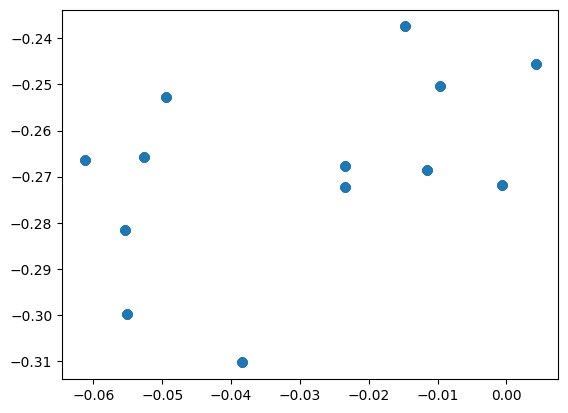

<Figure size 10000x10000 with 0 Axes>

In [92]:
plot_embeddings(embeddings, labels=None, run_tsne = True, run_pca = False)